# Titanic project from Kaggle

I will use this famous project to bild my first ML project.

In [6]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import os

In [7]:
train_data = pd.read_csv("train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_data = pd.read_csv("test.csv")

In [19]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Let's start to clean up the data

In [23]:
train_test_data = [train_data,test_data]

for i in train_test_data:
    i['Cabin'] = i['Cabin'].str[:1]

In [27]:
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()

<AxesSubplot:>

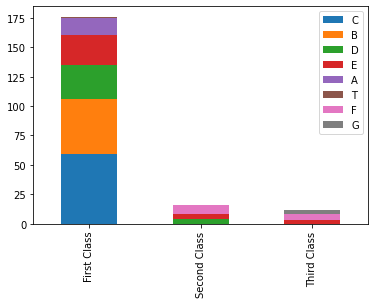

In [28]:
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['First Class','Second Class', 'Third Class']
df.plot(kind='bar',stacked=True )

In [29]:
cabin_mapping = {'A':0,'B':.4,'C':.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for i in train_test_data:
    i['Cabin'] = i['Cabin'].map(cabin_mapping)

In [31]:
train_data['Cabin'].fillna(train_data.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test_data['Cabin'].fillna(test_data.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [38]:
train_data['Cabin'].isnull().sum()

0

In [37]:
test_data['Cabin'].isnull().sum()

0

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

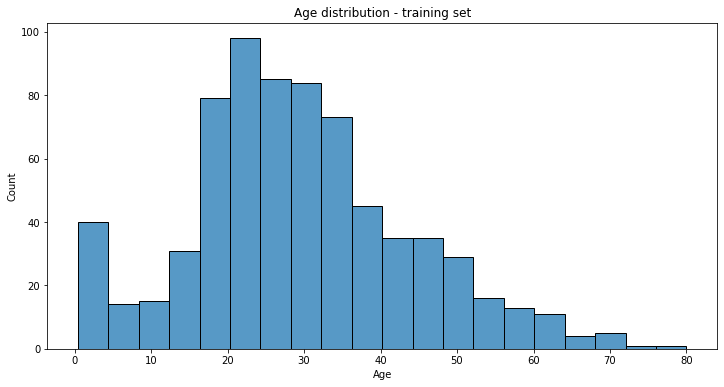

In [44]:
plt.figure(figsize = (12,6))
sns.histplot(data= train_data, x='Age')
plt.title('Age distribution - training set')
plt.show()

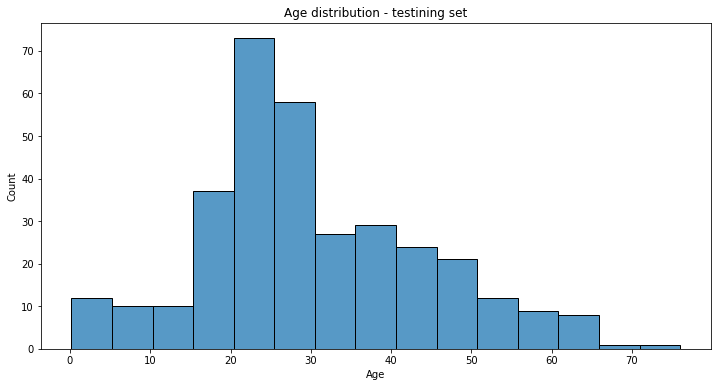

In [50]:
plt.figure(figsize = (12,6))
sns.histplot(data= test_data, x='Age')
plt.title('Age distribution - testining set')
plt.show()

In [54]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [55]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [52]:
#Fares are missing form test data. Let's try to fill that missing data
test_data['Fare'].groupby(test_data['Pclass']).mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [53]:
#this show us the missing fare is a passenger from 3rd class 
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,2.0,S


In [57]:
test_data['Fare'].median()

14.4542

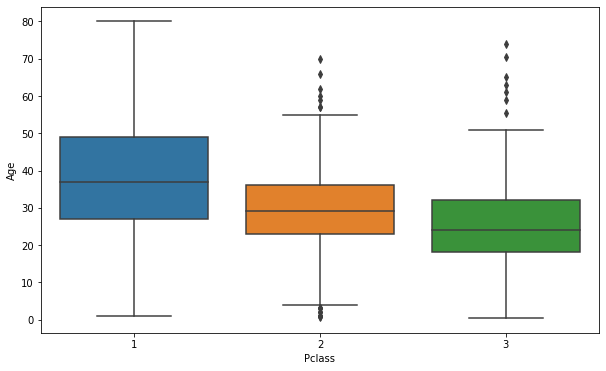

In [61]:
plt.figure(figsize = (10,6))
sns.boxplot(data = train_data, x='Pclass', y=  'Age')
plt.show()

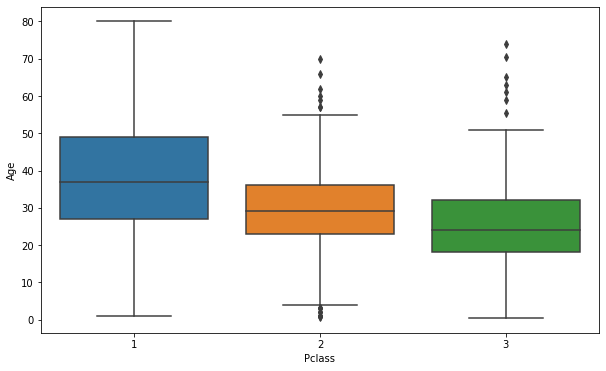

In [62]:
plt.figure(figsize = (10,6))
sns.boxplot(data = train_data, x='Pclass', y=  'Age')
plt.show()

In [63]:
test_data[test_data['Pclass']==3].median()['Fare']

C:\Users\annau\AppData\Local\Temp/ipykernel_32672/4007620764.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data[test_data['Pclass']==3].median()['Fare']


7.8958

In [65]:
test_data['Fare'] = test_data['Fare'].fillna(7.90)

In [67]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

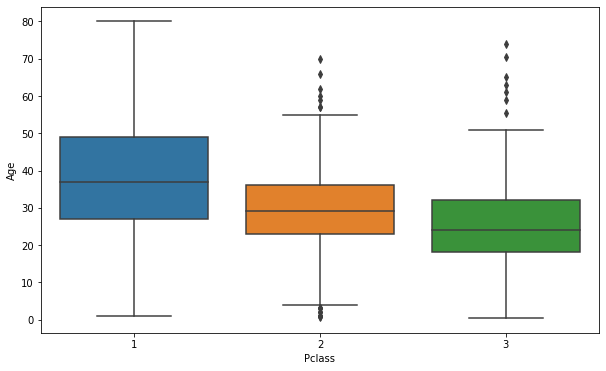

In [68]:
plt.figure(figsize = (10,6))
sns.boxplot(data = train_data, x='Pclass', y=  'Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

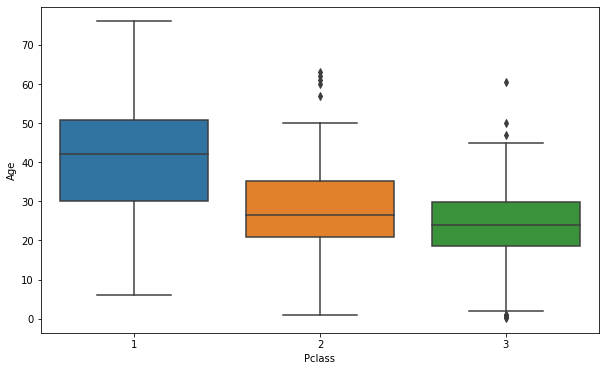

In [69]:
plt.figure(figsize = (10,6))
sns.boxplot(data = test_data, x='Pclass', y=  'Age')

In [71]:
# many missing values in age column
train_data['Age'].groupby(train_data['Pclass']).median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [72]:
#create a function to apply to both datasets Age columns

def imputed_age(cols):
    Age = cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [73]:
train_data['Age'] = train_data[['Age','Pclass']].apply(imputed_age, axis=1)

In [74]:
test_data['Age'].groupby(test_data['Pclass']).median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [77]:
def imputed_age_t(cols):
    Age = cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [78]:
test_data['Age'] = test_data[['Age','Pclass']].apply(imputed_age_t, axis=1)

In [79]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [80]:
sex_mapping = {'female':0, 'male':1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)

In [82]:
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

In [83]:
train_data['Age'] = train_data['Age'].astype('int')
test_data['Age'] = test_data['Age'].astype('int')

C:\Users\annau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1008x576 with 0 Axes>

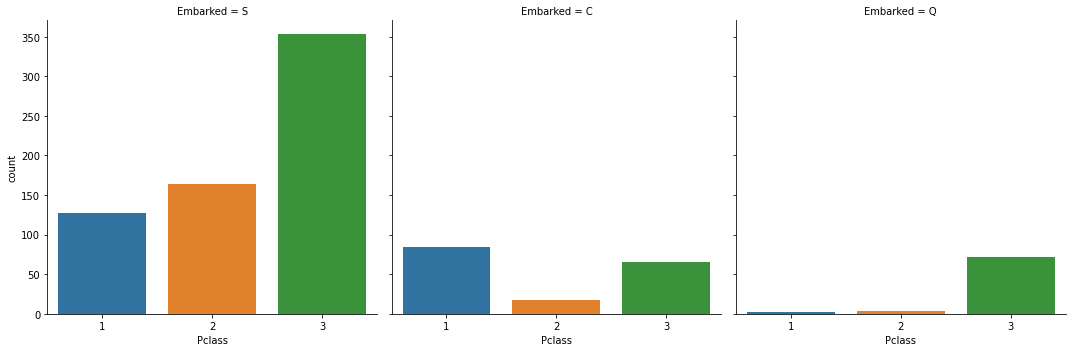

In [84]:
plt.figure(figsize=(14,8))
sns.catplot('Pclass', col='Embarked', kind='count', data=train_data)

In [86]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38,0,0,113572,80.0,0.4,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62,0,0,113572,80.0,0.4,NaN


In [87]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [89]:
test_data['Embarked'] = test_data['Embarked'].fillna('S')

In [90]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,2.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0.8,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,2.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,0.8,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,2.0,S


Let's work with Names

In [93]:
train_data['New_name'] = [x.split(',')[1].split('.')[0].strip() for x in train_data['Name']]

In [94]:
train_data['New_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [95]:
test_data['New_name'] = [x.split(',')[1].split('.')[0].strip() for x in test_data['Name']]

In [96]:
test_data['New_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [97]:
test_data['New_name'] = test_data['New_name'].replace(['Col','Rev','Dr','Dona'],'Other')

In [98]:
test_data['New_name'] = test_data['New_name'].replace('Ms','Miss')

In [99]:
test_data['New_name'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: New_name, dtype: int64

In [100]:
train_data['New_name'] = train_data['New_name'].replace(['Col','Rev','Dr','Don','Major','Lady','Sir','Capt','the Countess','Jonkheer'], 'Other')

In [101]:
train_data['New_name'] = train_data['New_name'].replace(['Mme','Ms','Mlle'],'Miss')

In [103]:
train_data['New_name'].value_counts()

Mr        517
Miss      186
Mrs       125
Master     40
Other      23
Name: New_name, dtype: int64

In [104]:
test_data = test_data.drop('Name', axis=1)
train_data = train_data.drop('Name', axis=1)

In [105]:
#Need to encode these titles to work with
title_mapping = {'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Other':4}

In [106]:
train_data['New_name'] = train_data['New_name'].map(title_mapping)
test_data['New_name'] = test_data['New_name'].map(title_mapping)

In [107]:
test_data = test_data.drop('Ticket', axis=1)
train_data = train_data.drop('Ticket', axis=1)

In [108]:
#Need to encode the embarked column
embarked_mapping = {'S':0,'C':1,'Q':2}

train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

<AxesSubplot:xlabel='Parch', ylabel='count'>

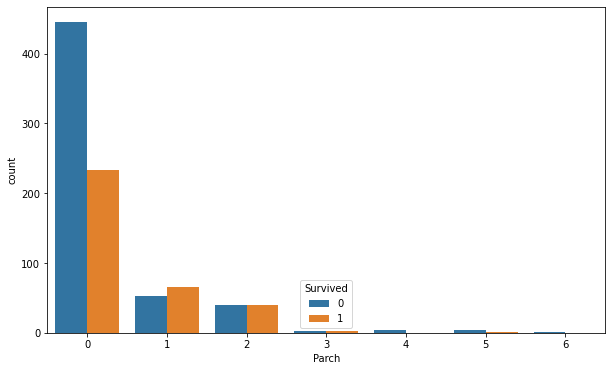

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x='Parch',hue='Survived')

In [111]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] + 1

In [112]:
train_data['Family_size'].max()

11

In [113]:
test_data['Family_size'].max()

11

<AxesSubplot:xlabel='Family_size', ylabel='count'>

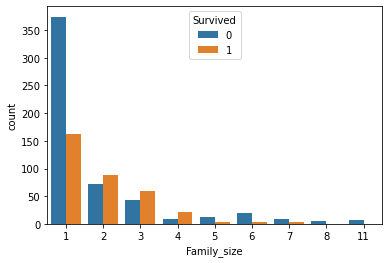

In [114]:
sns.countplot(data=train_data, x = 'Family_size', hue= 'Survived')

In [115]:
family_mapping = {1:0,2:.4,3:.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}

train_data['Family_size'] = train_data['Family_size'].map(family_mapping)
test_data['Family_size'] = test_data['Family_size'].map(family_mapping)

test_data = test_data.drop(['SibSp','Parch'], axis=1)
train_data = train_data.drop(['SibSp','Parch'], axis=1)

In [120]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,New_name,Family_size
0,1,0,3,1,22,7.2500,2.0,0,0,0.4
1,2,1,1,0,38,71.2833,0.8,1,1,0.4
2,3,1,3,0,26,7.9250,2.0,0,2,0.0
3,4,1,1,0,35,53.1000,0.8,0,1,0.4
4,5,0,3,1,35,8.0500,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,13.0000,1.8,0,4,0.0
887,888,1,1,0,19,30.0000,0.4,0,2,0.0
888,889,0,3,0,24,23.4500,2.0,0,2,1.2
889,890,1,1,1,26,30.0000,0.8,1,0,0.0


<Figure size 720x432 with 0 Axes>

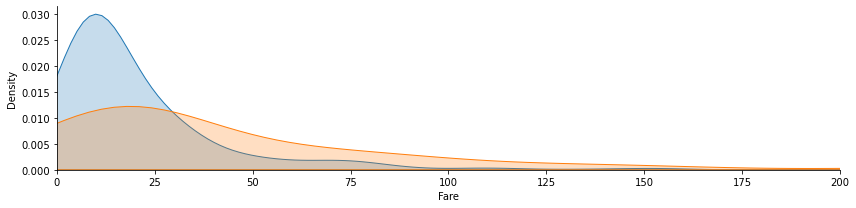

In [121]:
plt.figure(figsize=(10,6))
facet = sns.FacetGrid(train_data, hue='Survived', aspect =4)
facet.set(xlim=(0,200))
facet.map(sns.kdeplot, 'Fare', shade = True)


In [123]:
train_data.loc[train_data['Fare']<=20,'Fare'] = 0
train_data.loc[(train_data['Fare'] > 20) & (train_data['Fare'] <= 70),'Fare'] = 1
train_data.loc[(train_data['Fare'] > 70) & (train_data['Fare'] <= 175),'Fare'] = 2
train_data.loc[train_data['Fare'] > 175,'Fare'] = 3

test_data.loc[test_data['Fare']<=20,'Fare'] = 0
test_data.loc[(test_data['Fare'] > 20) & (test_data['Fare'] <= 70),'Fare'] = 1
test_data.loc[(test_data['Fare'] > 70) & (test_data['Fare'] <= 175),'Fare'] = 2
test_data.loc[test_data['Fare'] > 175,'Fare'] = 3

In [124]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,New_name,Family_size
0,1,0,3,1,22,0.0,2.0,0,0,0.4
1,2,1,1,0,38,2.0,0.8,1,1,0.4
2,3,1,3,0,26,0.0,2.0,0,2,0.0
3,4,1,1,0,35,1.0,0.8,0,1,0.4
4,5,0,3,1,35,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0.0,1.8,0,4,0.0
887,888,1,1,0,19,1.0,0.4,0,2,0.0
888,889,0,3,0,24,1.0,2.0,0,2,1.2
889,890,1,1,1,26,1.0,0.8,1,0,0.0


In [125]:
test_data

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,New_name,Family_size
0,892,3,1,34,0.0,2.0,2,0,0.0
1,893,3,0,47,0.0,2.0,0,1,0.4
2,894,2,1,62,0.0,2.0,2,0,0.0
3,895,3,1,27,0.0,2.0,0,0,0.0
4,896,3,0,22,0.0,2.0,0,1,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,24,0.0,2.0,0,0,0.0
414,1306,1,0,39,2.0,0.8,1,4,0.0
415,1307,3,1,38,0.0,2.0,0,0,0.0
416,1308,3,1,24,0.0,2.0,0,0,0.0


In [126]:
X_train = train_data.drop(['PassengerId','Survived'], axis=1)

In [127]:
y_train = train_data['Survived']

In [128]:
X_test = test_data.drop('PassengerId',axis=1)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [130]:
log_model = LogisticRegression()

In [131]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [132]:
predictions = log_model.predict(X_test)

In [133]:
log_model.score(X_train, y_train)

0.8069584736251403

In [134]:
#submit_logmodel = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':predictions})
#submit_logmodel.to_csv('titantic_log_model.csv', index=False)

In [137]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "Family_size", "New_name"]
X = pd.get_dummies(train_data[features])
X_test1 = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test1)
model.score(X, y)

0.835016835016835

In [139]:

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
